In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Simulating stock return data assuming you already have a 'returns' dataframe
# Assuming the dataframe "returns" has multiple columns, each column is a stock's return
# Example structure:
returns = pd.DataFrame({
    'Stock A': np.random.normal(0, 1, 1000),
    'Stock B': np.random.normal(0, 1.2, 1000),
    'Stock C': np.random.normal(0.1, 0.8, 1000),
    'Stock D': np.random.normal(-0.2, 1, 1000),
})




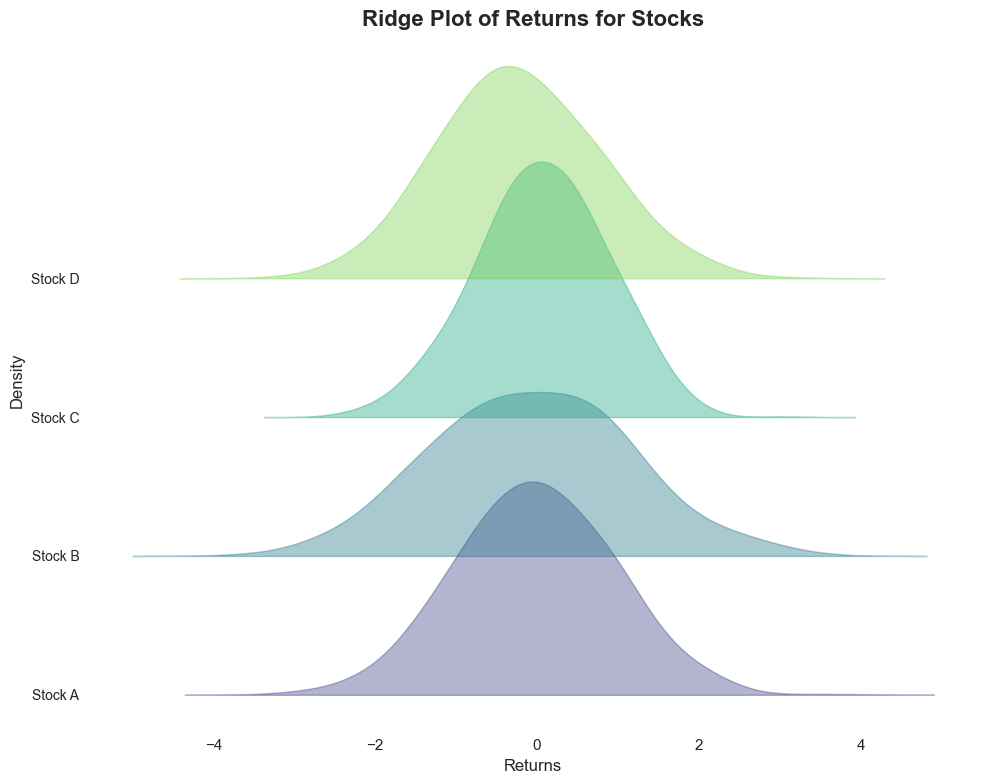

In [12]:
# Define number of stocks and vertical spacing
stocks = returns.columns
num_stocks = len(stocks)
y_spacing = .25  # Space between curves

# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "white"})

# Prepare figure
fig, ax = plt.subplots(figsize=(10, 8))

# Color palette
colors = sns.color_palette("viridis", num_stocks)

# Loop to calculate and plot KDE for each stock with vertical offsets
for i, stock in enumerate(stocks):
    # Calculate KDE for the stock
    data = returns[stock].dropna()
    kde = sns.kdeplot(data, bw_adjust=1.5, gridsize=200, clip=(-5, 5), cumulative=False)
    x, y = kde.lines[-1].get_data()
    
    # Adjust y values for vertical spacing
    y_shifted = y + i * y_spacing
    
    # Plot using fill_between
    ax.fill_between(x, i * y_spacing, y_shifted, color=colors[i], alpha=0.4)
    
    
    # Cleanup the extra Seaborn line to avoid duplication
    kde.lines[-1].remove()

# Aesthetics and labels
ax.set_yticks(np.arange(0, num_stocks * y_spacing, y_spacing))
ax.set_yticklabels(stocks, fontsize=10)
ax.set_xlabel("Returns", fontsize=12)
ax.set_title("Ridge Plot of Returns for Stocks", fontsize=16, weight="bold")

# Remove grid and spines for a cleaner look
ax.grid(False)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()